###  Кольчугин И.А. 17-АС ###
### Вариант 3. ###

Вторичный рынок машин.
1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.
3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
4. Заполнить пропущенные данные в строковых полях.
5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
9. Добавьте в набор данных признак, являющийся суммой двух других признаков.


In [43]:
import pandas as pd
autos_data = pd.read_csv('autos.csv', encoding='iso-8859-1')
autos_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


**1. Удалите столбцы, ценность которых для оценки стоимости машины низка.**

In [44]:
autos_data_drop = autos_data.drop(['seller','abtest', 'dateCrawled','offerType','postalCode','dateCreated','nrOfPictures', 'lastSeen'], axis = 1)
autos_data_drop

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


**2. Удалите повторяющиеся строки, строки содержащие пропуски в данных.**

In [45]:
au_data_drop = autos_data_drop.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])
au_data_drop

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [46]:
import numpy as np
au_data_dropnn = au_data_drop[au_data_drop.notnull().all(axis=1)]
au_data_dropnn

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,2005,manuell,3,3er,150000,5,diesel,bmw,nein
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein


In [47]:
#До удаления дубликатов и повторов:
print (autos_data_drop.shape[0]+1)

371529


In [48]:
#После удаления дубликатов и повторов:
print(au_data_dropnn.shape[0]+1)

254922


**3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя).**

In [49]:
condition_au = au_data_dropnn[(au_data_dropnn.price <= 100000) & (au_data_dropnn.price >= 20000) & (au_data_dropnn.yearOfRegistration <= 2014 ) & (au_data_dropnn.yearOfRegistration >= 2004) & (au_data_dropnn.powerPS >= 200) & (au_data_dropnn.powerPS <= 500)]
au_data_limits = au_data_dropnn.drop(condition_au.index)

In [50]:
# До удаления пределов:
print(au_data_dropnn.shape[0]+1)

254922


In [51]:
# После удаления пределов:
print(au_data_limits.shape[0]+1)

248296


**Для оценки диапазонов значений признаков используйте BoxPlot.**

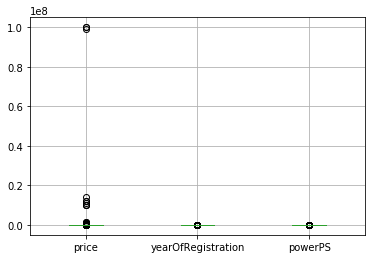

In [52]:
boxplot = au_data_limits.boxplot(column=['price','yearOfRegistration', 'powerPS'])
boxplot

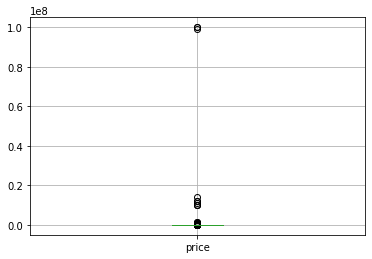

In [53]:
boxplot1 = au_data_limits.boxplot(column=['price'])
boxplot1

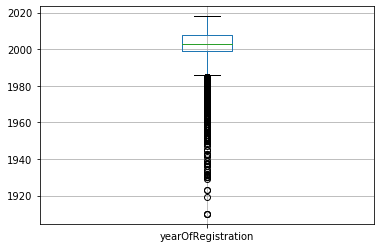

In [54]:
boxplot2 = au_data_limits.boxplot(column=['yearOfRegistration'])
boxplot2

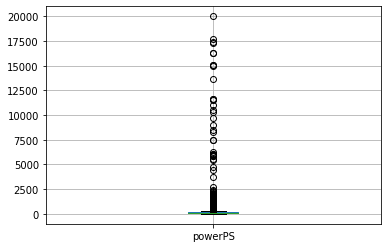

In [55]:
boxplot3 = au_data_limits.boxplot(column=['powerPS'])
boxplot3

**4. Заполнить пропущенные данные в строковых полях.**

In [56]:
au_data_drop2 = au_data_drop
au_data_drop2 = au_data_drop2.isnull().sum()
print('The total summation is',au_data_drop2.sum().sum())

The total summation is 179986


In [57]:
au_data_drop2 = au_data_drop2.fillna('str have no value')

In [58]:
au_data_drop2 = au_data_drop2.isnull().sum()
print('The total summation is',au_data_drop2.sum().sum())

The total summation is 0


**5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.**

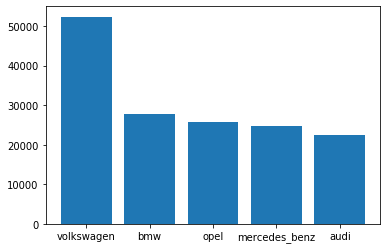

In [59]:
import matplotlib.pyplot as plt
import numpy as np
au_data_limits1 = au_data_limits
barray = au_data_limits1.groupby(by='brand').brand.count().sort_values(ascending=False)
plt.bar(np.arange(5),barray.head())
plt.xticks(np.arange(len(barray.head())),barray.index)
plt.show()

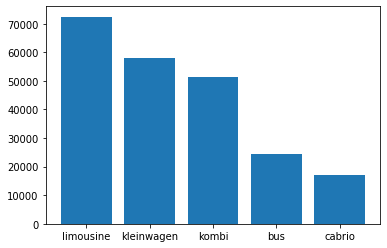

In [60]:
au_data_limits1 = au_data_limits
barray = au_data_limits1.groupby(by='vehicleType').vehicleType.count().sort_values(ascending=False)
plt.bar(np.arange(5),barray.head())
plt.xticks(np.arange(len(barray.head())),barray.index)
plt.show()

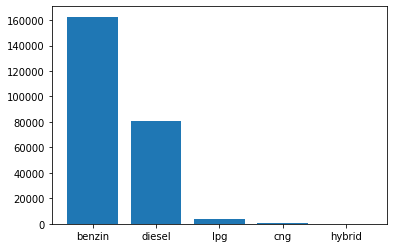

In [61]:
au_data_limits1 = au_data_limits
barray = au_data_limits1.groupby(by='fuelType').fuelType.count().sort_values(ascending=False)
plt.bar(np.arange(5),barray.head())
plt.xticks(np.arange(len(barray.head())),barray.index)
plt.show()

**6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.**

In [62]:
def count(name):
    return name.str.len()
count_symb = au_data_limits['name'].astype(str) #приводим name к строковому значению
count_symb = count(count_symb) #вызываем функцию count и считаем кол-во строк


In [63]:
new_column = au_data_limits
new_column['length_name'] = count_symb
new_column

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,length_name
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,30
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,50
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,27
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein,32
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,2005,manuell,3,3er,150000,5,diesel,bmw,nein,25
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,12
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,37


**7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.**

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,length_name
price,1.000000,0.008504,0.006651,-0.012303,0.004752,0.001697
yearOfRegistration,0.008504,1.000000,0.073877,-0.377965,0.032356,0.063154
powerPS,0.006651,0.073877,1.000000,0.009527,0.013501,0.013600
kilometer,-0.012303,-0.377965,0.009527,1.000000,-0.002762,-0.034875
monthOfRegistration,0.004752,0.032356,0.013501,-0.002762,1.000000,0.006575
length_name,0.001697,0.063154,0.013600,-0.034875,0.006575,1.000000


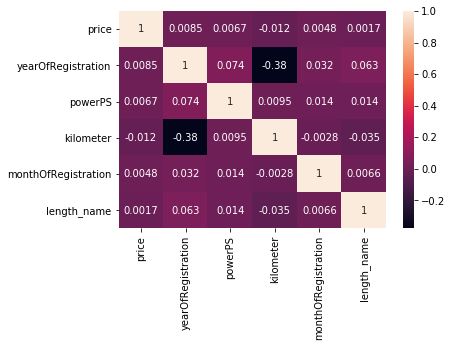

In [64]:
import seaborn as sn
correlation  = new_column.corr()
heatmap = sn.heatmap(correlation, annot=True)
heatmap
correlation 

**8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. 
Оцените значение p-value. Постройте плотность распределения признаков.**

Коэффициент корреляции Пирсона:  (-7.11525418644924e-05, 0.971717272321496)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.03468320294806129, pvalue=5.8453191935717614e-67)
p-value is good


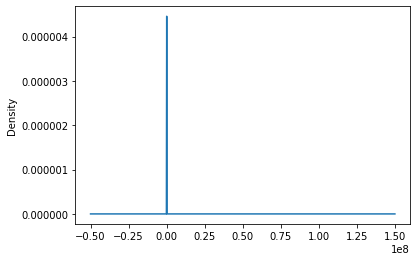

In [65]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

lblnc = LabelEncoder()
vehicleCoder = pd.Series(lblnc.fit_transform(new_column.vehicleType))
pearsoncoef = pearsonr(new_column.price,vehicleCoder)
spearmancoef = spearmanr(new_column.price,vehicleCoder)

print("Коэффициент корреляции Пирсона: ",pearsoncoef)
print("Коэффициент корреляции Спирмена: ",spearmancoef)

if (spearmancoef[1] < 0.05):
    print("Значимая вероятность ошибки")
else:
    print("Не значимая")

a_price = pd.Series(new_column.price)
a_price.plot.kde()


**9. Добавьте в набор данных признак, являющийся суммой двух других признаков.**

In [66]:
new_sign = new_column
new_sign['sum_of_col'] = new_sign['vehicleType'] + '/' + new_sign['gearbox']
new_sign

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,length_name,sum_of_col
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,18,kleinwagen/manuell
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,30,kleinwagen/manuell
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,50,limousine/manuell
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,27,cabrio/manuell
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,28,limousine/manuell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein,32,limousine/manuell
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,2005,manuell,3,3er,150000,5,diesel,bmw,nein,25,kombi/manuell
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,12,limousine/manuell
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,37,cabrio/automatik
